In [1]:
!pip list

Package                 Version
----------------------- --------------------
absl-py                 1.4.0
appnope                 0.1.4
asttokens               2.4.1
async-generator         1.10
attrs                   22.2.0
backcall                0.2.0
cachetools              5.3.0
certifi                 2024.2.2
charset-normalizer      3.1.0
comm                    0.2.2
contourpy               1.0.7
cycler                  0.11.0
debugpy                 1.6.7
decorator               5.1.1
exceptiongroup          1.1.1
executing               2.0.1
fonttools               4.39.0
google-auth             2.16.2
google-auth-oauthlib    0.4.6
grpcio                  1.51.3
h11                     0.14.0
idna                    3.4
importlib_metadata      7.1.0
importlib-resources     5.12.0
ipykernel               6.29.3
ipython                 8.12.0
jedi                    0.19.1
jupyter_client          8.6.1
jupyter_core            5.7.2
kiwisolver              1.4.4
Markdown     

In [2]:
import json
import pandas as pd

with open("AVA_caption/AVA_FULL_VALIDATION.json", 'r') as f:
    json_data = json.load(f)
# print(json.dumps(json_data, indent="\t"))
print(len(json_data))
print(json_data.keys())
print(json_data['info'])
print(json_data['licenses'])
print(json_data['type'])
print(json_data['images'])
print(len(json_data['images']))
print(json_data['annotations'][0])
image_list = [int(data['file_name'].replace('.jpg', '')) for data in json_data['images']]
print(image_list)

5
dict_keys(['info', 'licenses', 'images', 'type', 'annotations'])
bullshit
bullshit
captions
[{'license': 3, 'url': '', 'file_name': '954180.jpg', 'height': None, 'width': None, 'date_captured': None, 'id': 954180}, {'license': 3, 'url': '', 'file_name': '953126.jpg', 'height': None, 'width': None, 'date_captured': None, 'id': 953126}, {'license': 3, 'url': '', 'file_name': '953935.jpg', 'height': None, 'width': None, 'date_captured': None, 'id': 953935}, {'license': 3, 'url': '', 'file_name': '953977.jpg', 'height': None, 'width': None, 'date_captured': None, 'id': 953977}, {'license': 3, 'url': '', 'file_name': '953401.jpg', 'height': None, 'width': None, 'date_captured': None, 'id': 953401}, {'license': 3, 'url': '', 'file_name': '770869.jpg', 'height': None, 'width': None, 'date_captured': None, 'id': 770869}, {'license': 3, 'url': '', 'file_name': '770185.jpg', 'height': None, 'width': None, 'date_captured': None, 'id': 770185}, {'license': 3, 'url': '', 'file_name': '770486.jpg'

In [3]:
df = pd.DataFrame(json_data['annotations'])
df

,image_id,id,caption
0,954180,146,super nice envious of this location love the v...
1,954180,147,what pretty coloring you have in the sky. i'm ...
2,953126,163,"great focal depth. nice texture, tactile, i ca..."
3,953935,190,sweet. great composition. great photo.
4,953977,192,enter at your peril or just sit and relax.
...,...,...,...
51053,57221,1315808,really like this alot! love the lighting and a...
51054,57221,1315809,nice wish i could see some more details on the...
51055,57221,1315810,this is really archaic looking in a good way i...
51056,57221,1315811,wavers between light and shadow. i think it wo...


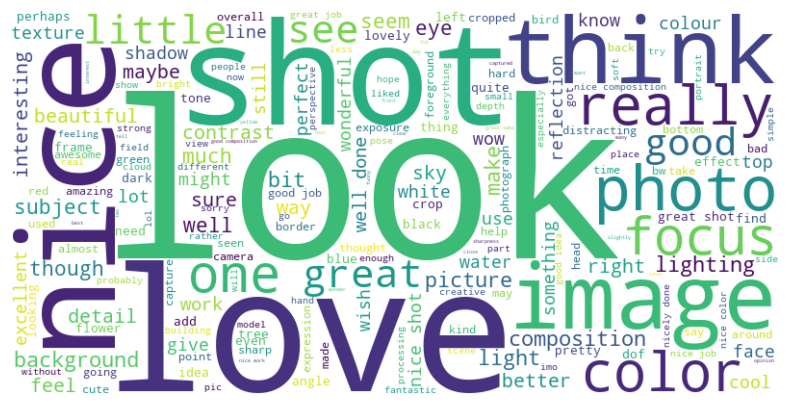

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


# 모든 행의 caption을 하나의 문자열로 결합
all_text = ' '.join(df['caption'])

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# 워드 클라우드 그리기
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [4]:
image_id = 954180
captions = df.loc[df['image_id'] == image_id, 'caption'].tolist()
captions

['super nice envious of this location love the view and the purple soft light.',
 "what pretty coloring you have in the sky. i'm jealous of where you live."]

In [5]:
grouped = df.groupby('image_id').count()
grouped

,id,caption
image_id,,
101,3,3
184,1,1
193,7,7
194,3,3
198,7,7
...,...,...
957447,8,8
957597,6,6
958137,1,1


In [6]:
cnt = [0 for i in range(100)]
weighted_sum = 0
for i in range(100):
    cnt[i] = grouped.loc[grouped['caption'] == i].count().caption
    weighted_sum += cnt[i]*i
print(cnt)
print(weighted_sum/sum(cnt))
print(sum(cnt))

[0, 1207, 1423, 1350, 1150, 908, 743, 540, 433, 323, 258, 201, 164, 119, 106, 73, 57, 39, 54, 28, 21, 18, 18, 17, 17, 11, 9, 11, 7, 6, 4, 3, 1, 4, 3, 2, 1, 4, 3, 3, 2, 3, 1, 4, 2, 0, 2, 1, 3, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
5.453749198889127
9362


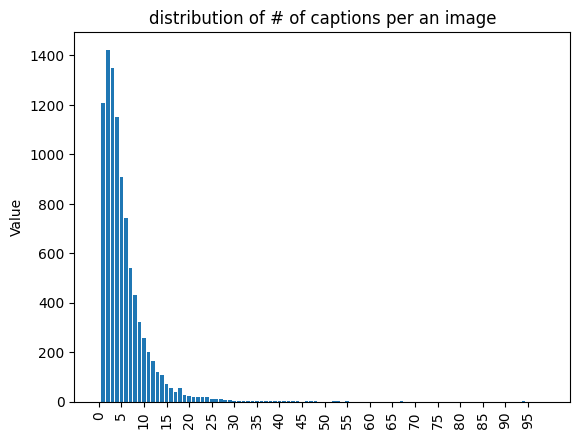

In [76]:
import matplotlib.pyplot as plt

plt.bar(range(len(cnt)), cnt)

plt.ylabel('Value')
plt.rc('font', size=10) 
plt.xticks(range(0, len(cnt), 5),fontsize=10, rotation=90)
plt.rc('axes', labelsize=10)   # x,y축 label 폰트 크기
plt.title('distribution of # of captions per an image')

# 그래프 표시
plt.show()

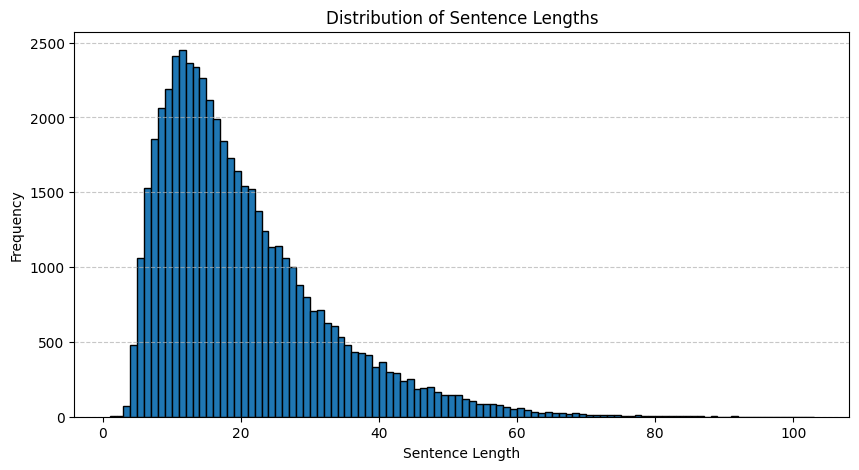

In [79]:
# 각 문장의 길이 계산
sentence_lengths = df['caption'].apply(lambda x: len(x.split()))

# 막대 그래프로 문장 길이의 분포 시각화
plt.figure(figsize=(10, 5))
plt.hist(sentence_lengths, bins=range(min(sentence_lengths), max(sentence_lengths) + 1), edgecolor='black')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [8]:
image_id = 106707
captions = df.loc[df['image_id'] == image_id, 'caption'].tolist()
captions

['wonderful color sat, comp and mood! great image.',
 'wow! the sunset really sets off the colour of the castle. this is a remarkable photo',
 'one the most beautiful color combinations i have seen. it has such an alive feeling because the viewer gets an intense sense that the sun is almost right there shining on the building and the grass. it has the richness of a painting.',
 "that's not barrel distortion though.",
 "very nice! there is some distracting barrel distortion though. if you have photoshop, try downloading panoramatools. it's a free plugin including a barrel distortion fixer. there are some instructions on how to use it at dpreview",
 'love the colors, but the burning is very unnatural.',
 'awsome awsome awsome! i can tell u used photoshop for the background color. thats great!',
 'wonderful composition, and angle of lighting with regard to your positioning, i like that you have excellent shadow detail, and the that the highlights, though bright are far from blown away. ju

In [9]:
from torchvision.transforms import ToTensor
from torchvision import transforms
import torch.nn.functional as F
import torch.utils.data as data
import numpy as np
import os
from PIL import Image

fname="/Users/baejuhyeon/Documents/CVL/Aesthetics Captioning/AVA_caption/AVA_FULL_VALIDATION.json"
image_folder = "/Users/baejuhyeon/Documents/CVL/AVA/images"

def resize_image(image_tensor, size=(3, 224, 224)):
    if image_tensor.size(0) == 1:
        # 이미지가 [1, 224, 224] 크기인 경우, 채널을 3으로 복사하여 [3, 224, 224]로 변환
        image_tensor = image_tensor.expand(3, -1, -1)
    transformer = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((size[1], size[2])),
        transforms.ToTensor()
    ])
    image_tensor = F.interpolate(image_tensor.unsqueeze(0), size=(size[1], size[2]), mode='nearest').squeeze(0)
    return image_tensor

# 이미지를 불러와 딕셔너리 리스트로 변환
def load_images(data, folder):
    image_dict = {}
    tf_toTensor = ToTensor() 
    for item in data:
        file_name = item['file_name']
        image_path = os.path.join(folder, file_name)

        if os.path.exists(image_path):
            try:
                image = Image.open(image_path)
                
                # PIL to Tensor
                image_tensor = resize_image(tf_toTensor(image))

                image_dict[item['id']] = image_tensor
            except Exception as e:
                print(f"이미지를 불러오는 중 오류가 발생했습니다: {e}")
        else:
            image_dict[item['id']] = None
    return image_dict

def get_dataframe_and_image(file_name=fname):
    with open(file_name, 'r') as f:
        json_data = json.load(f)
    df = pd.DataFrame(json_data['annotations'])
    image_list = [int(data['file_name'].replace('.jpg', '')) for data in json_data['images']]
    image_dict = load_images(json_data['images'], image_folder)
    return df, image_list, image_dict

/Users/baejuhyeon/opt/anaconda3/envs/yolov7/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
import random

class AVACaptioningDataset(data.Dataset):
    def __init__(self, df, image_list, image_dict, transform=None, train=True):
        super(AVACaptioningDataset, self).__init__()

        """
        opt_data : 'train', 'validation'
        
        """
        self.df = df
        self.image_list = image_list
        self.image_dict = image_dict
        
    def __getitem__(self, index):
        image_name = self.image_list[index]
        image = self.image_dict[image_name]

        captions = self.df.loc[self.df['image_id']==image_name, 'caption'].tolist()
        caption = []
        if len(captions) > 0:
            caption.append(random.choice(captions))
        return image, caption

    def __len__(self):
        return len(self.image_list)

In [16]:
df, img_list, img_dict = get_dataframe_and_image()

train_data = AVACaptioningDataset(df, img_list, img_dict)
train_loader = data.DataLoader(train_data, batch_size=10, shuffle=True)

/Users/baejuhyeon/opt/anaconda3/envs/yolov7/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


9362


In [57]:
images, labels = next(iter(train_loader))
labels[0]

('ok, so what is it? this is well done.excellent focus and processing',
 'i love how u took this picture catching the st sign of spring.',
 'i like the pose and expression. the pink shirt and all the colors are really distracting. i would recommend converting to bw and eliminate some of the distraction.',
 "i agree with don about the woman on the right. it's like she's caught up in her own internal movie for which she is posing.",
 'one odd effect but good is how the red light seems to be pouring into the light rather than the light coming up. my assumption is that that bit was an accident but that makes no difference.',
 'i must say i normally like sharper images for this sort of subject but the soft focus here works imo. it does a good job of accentuating the delicate nature of the drops.',
 'haha, good one.would just love it if it would be a bit more clearer, its either a hands shaking or bad focus inho',
 "effective dof, bringing the focus right to the tip of the pencil. the compos

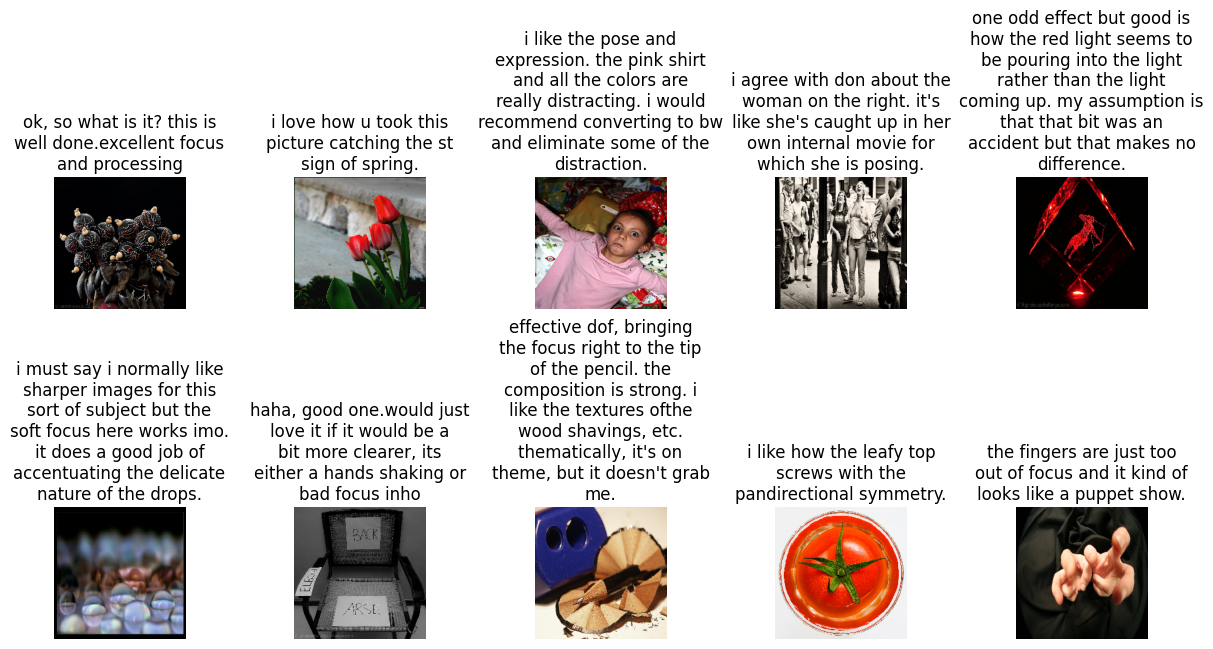

In [58]:
text_max_len = 27

def split_caption(caption, max_length=27):
    words = caption.split()
    lines = ""
    current_line = ""
    cnt=0
    for word in words:
        if len(current_line) + len(word) + 1 <= max_length:
            current_line += " " + word
        else:
            lines+=current_line.strip()+"\n"
            current_line = word
            cnt += 1
        if cnt > 7:
            break
    if current_line:
        lines+=current_line.strip()
    return lines

# 이미지 플로팅 함수
def plot_images(image_tensors):
    num_images = len(image_tensors)
    num_cols = 5  # 5개의 열로 이미지를 배치합니다.
    num_rows = (num_images + num_cols - 1) // num_cols  # 이미지 개수에 따라 행 개수 결정
    plt.figure(figsize=(15, 3 * num_rows))  # 플롯 크기 설정
    
    for i, image_tensor in enumerate(image_tensors):
        plt.subplot(num_rows, num_cols, i + 1)
        image_np = image_tensor.permute(1, 2, 0).numpy()  # 텐서를 넘파이 배열로 변환하여 이미지 플로팅
        plt.imshow(image_np)
        plt.axis('off')  # 축 숨김
        caption = labels[0][i]
        plt.title(split_caption(caption))  # 이미지 제목 설정

    plt.subplots_adjust(wspace=0.2, hspace=1.5)
    plt.show()

# 이미지 플로팅
plot_images(images)